In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from itertools import combinations
from collections import Counter

import os

# Concordance Testing Between Toil-rnaseq Versions

John Vivian <br>
2/11/2017

Ensure that the versions of toil-rnaseq are concordant.

TEST_208 = `toil-scripts==2.0.8` and `toil==3.3.0`<br>
TEST_209 = `toil-scripts==2.0.9` and `toil==3.3.0`<br>
TEST_210 = `toil-scripts==2.0.10` and `toil==3.3.0`<br>
TEST_211 = `toil-scripts==2.0.11` and `toil==3.3.0`<br>
TEST_302 = `toil-rnaseq==3.0.2` and `toil-lib==1.1.1` and `toil==3.5.0` <br>
TEST_310 = `toil-rnaseq==3.1.0` and `toil-lib==1.1.3` and `toil==3.6.0`

# EGAR Sample

In [3]:
egar_samples = ['TEST_208_EGAR', 'TEST_209_EGAR', 'TEST_210_EGAR', 'TEST_211_EGAR', 'TEST_302_EGAR', 'TEST_310_EGAR']
rsem = {}
kallisto = {}
for sample in egar_samples:
    rsem[sample] = pd.read_csv(sample + '/rsem/rsem_genes.results', sep='\t')
    kallisto[sample] = pd.read_csv(sample + '/kallisto/abundance.tsv', sep='\t')

### RSEM

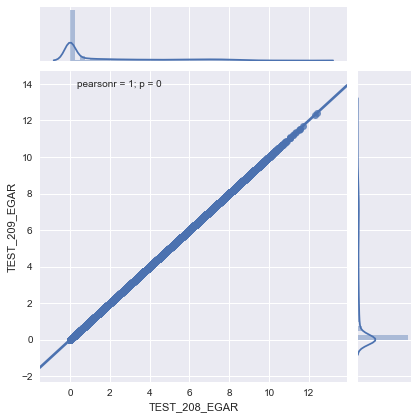

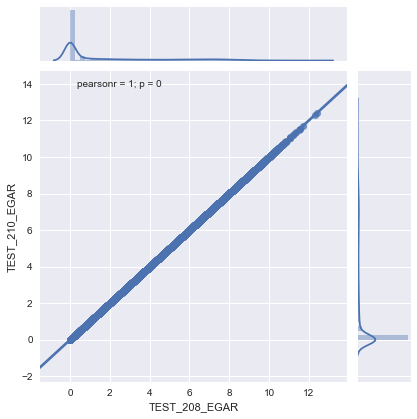

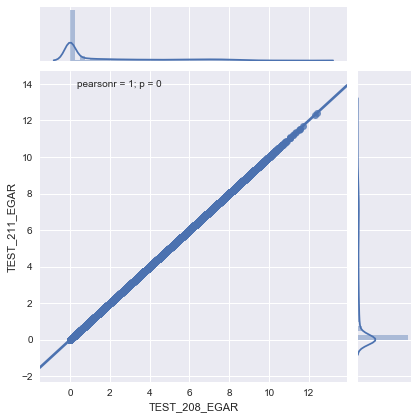

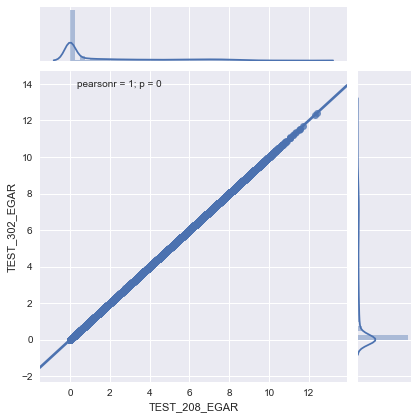

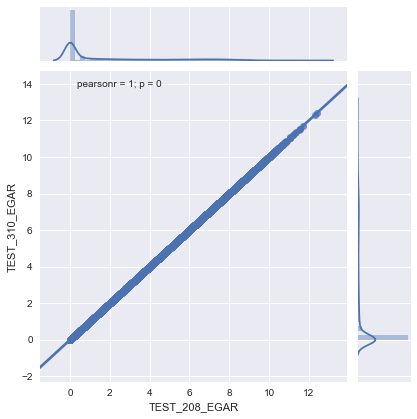

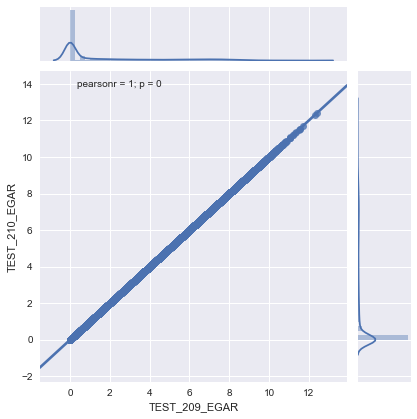

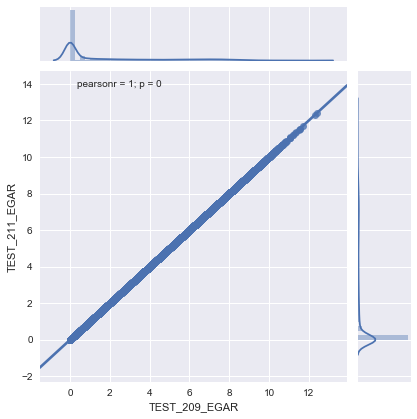

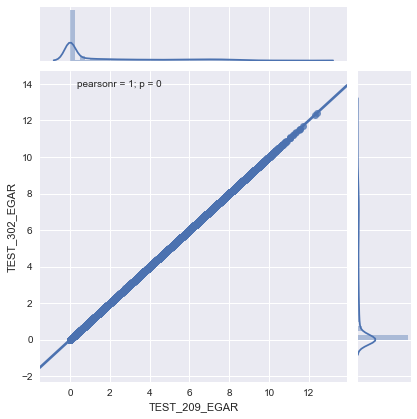

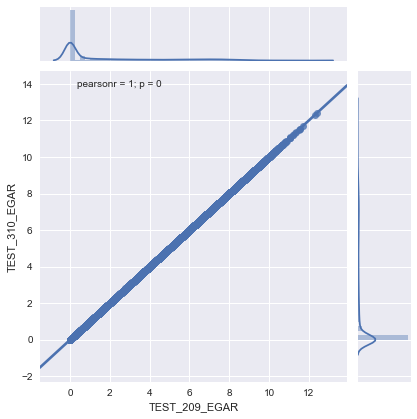

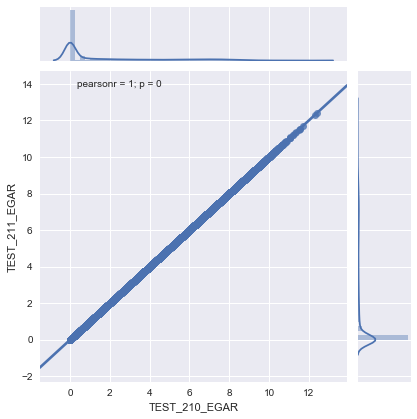

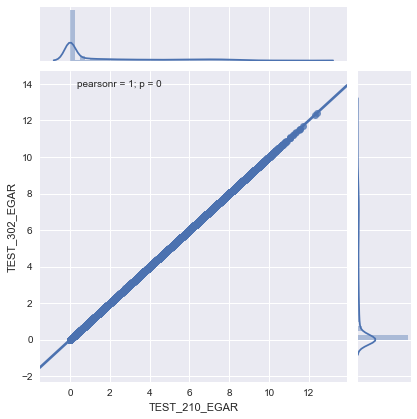

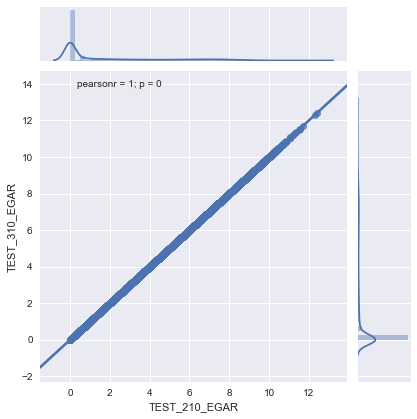

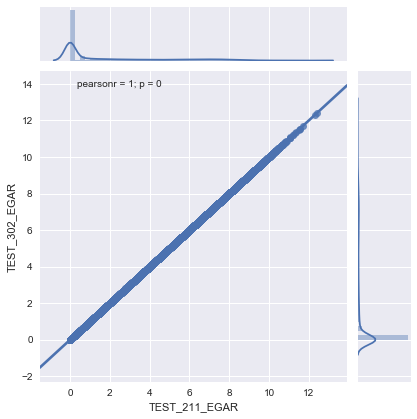

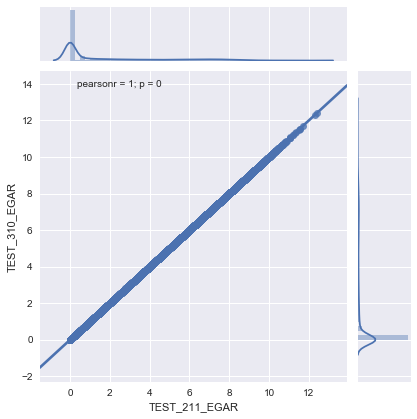

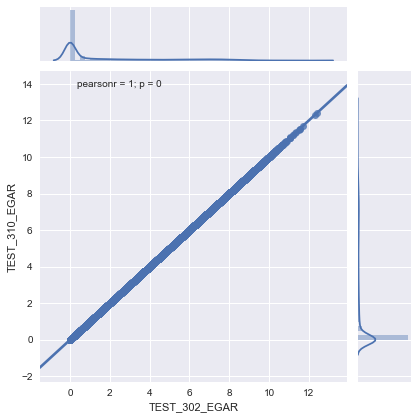

In [9]:
for a, b in combinations(egar_samples, 2):
    assert list(rsem[a].gene_id) == list(rsem[b].gene_id)
    x = rsem[a].expected_count.apply(lambda x: np.log(x+1))
    y = rsem[b].expected_count.apply(lambda x: np.log(x+1))
    sns.jointplot(x, y, kind='reg');
    plt.xlabel(a)
    plt.ylabel(b)

### Kallisto

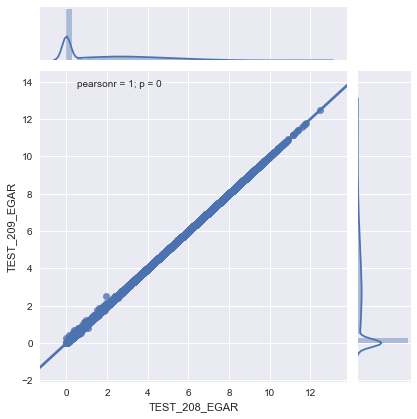

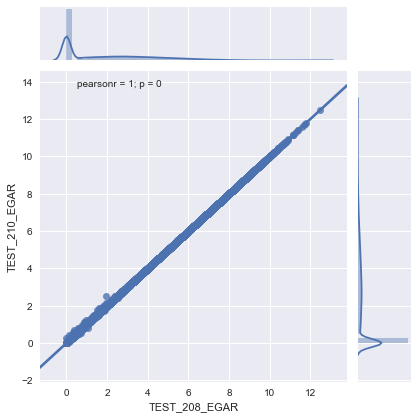

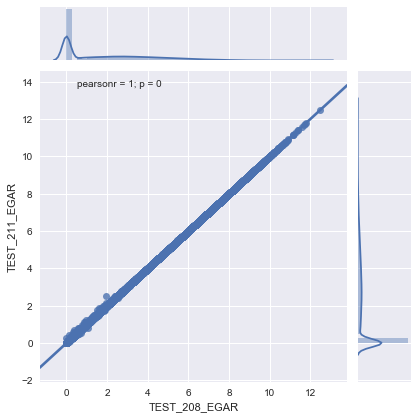

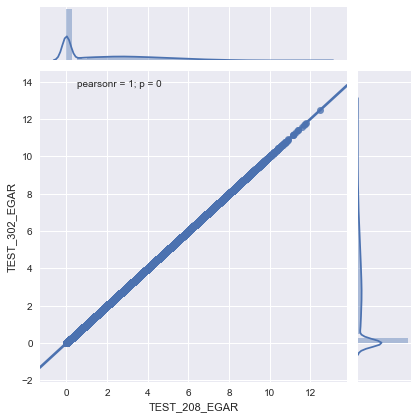

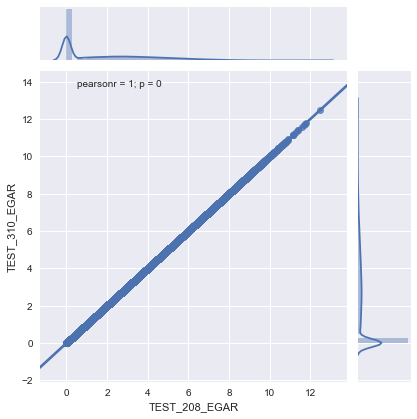

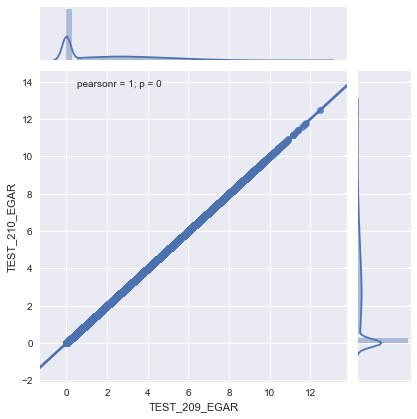

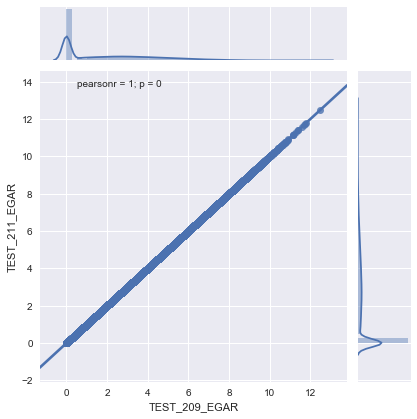

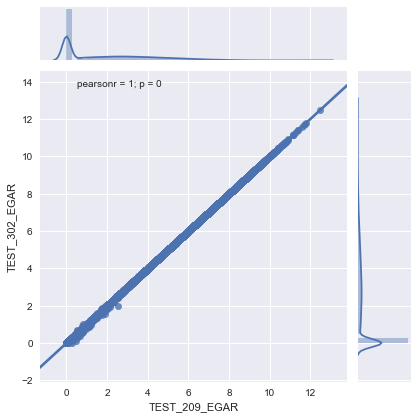

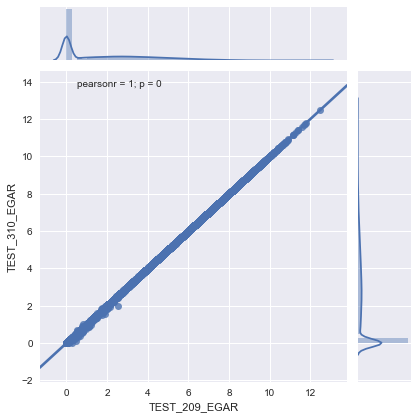

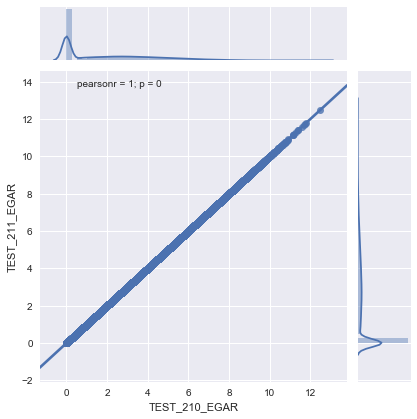

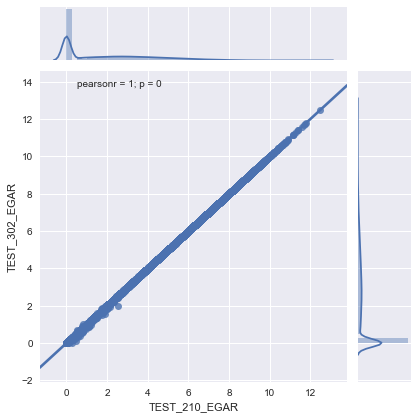

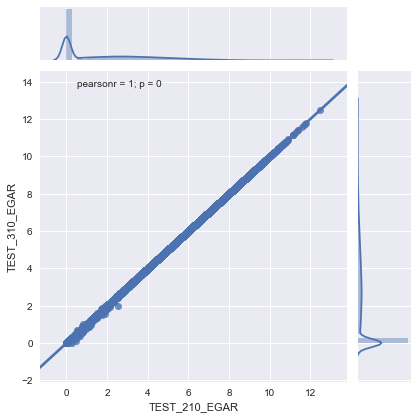

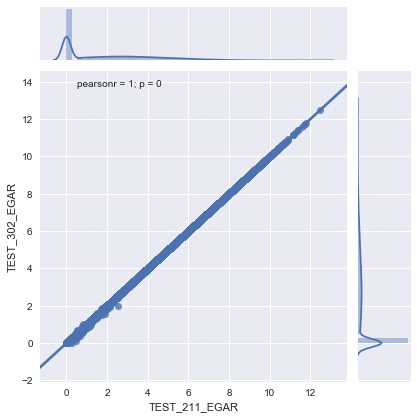

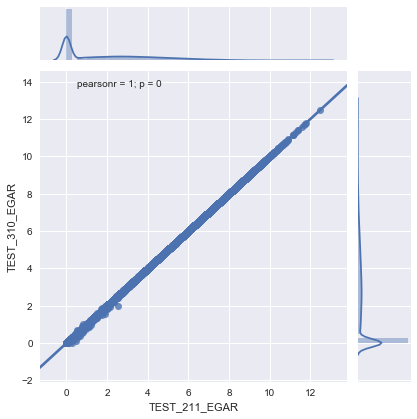

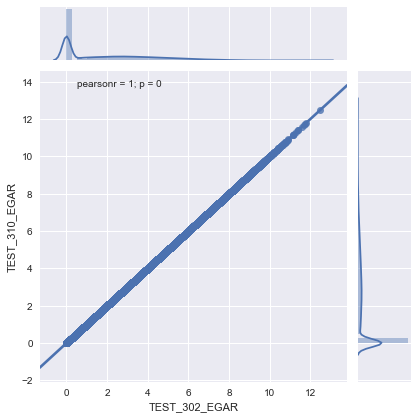

In [15]:
for a, b in combinations(egar_samples, 2):
    x = kallisto[a].est_counts.apply(lambda x: np.log(x+1))
    y = kallisto[b].est_counts.apply(lambda x: np.log(x+1))

    sns.jointplot(x, y, kind='reg')
    plt.xlabel(a)
    plt.ylabel(b);

### Diff Test

TEST_208_EGAR TEST_209_EGAR
Number of nonzero diffs: 0
Largest diff: 


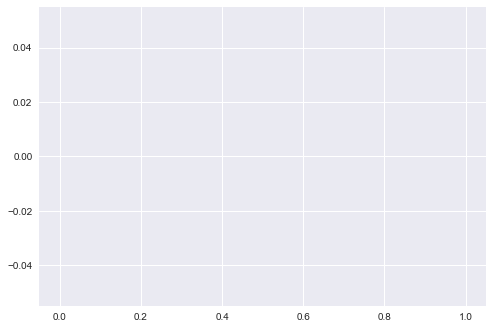

TEST_208_EGAR TEST_210_EGAR
Number of nonzero diffs: 0
Largest diff: 


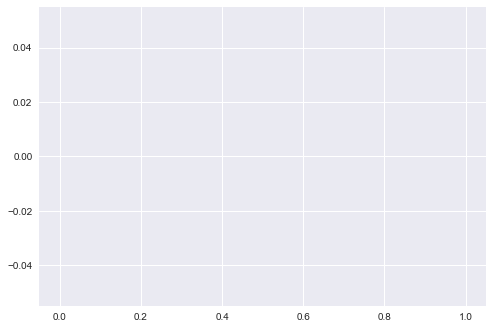

TEST_208_EGAR TEST_211_EGAR
Number of nonzero diffs: 0
Largest diff: 


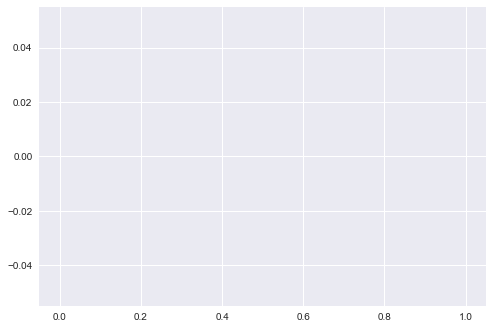

TEST_208_EGAR TEST_302_EGAR
Number of nonzero diffs: 234
Largest diff: 


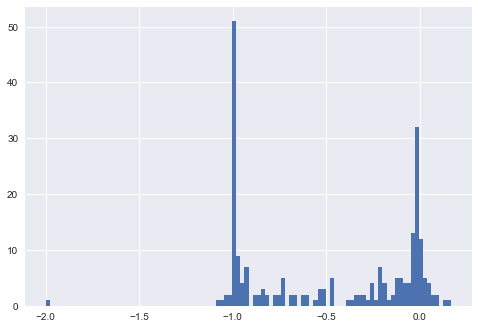

TEST_208_EGAR TEST_310_EGAR
Number of nonzero diffs: 234
Largest diff: 


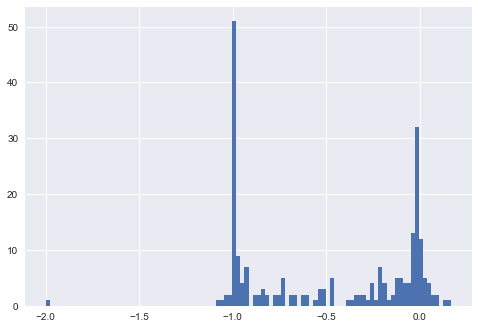

TEST_209_EGAR TEST_210_EGAR
Number of nonzero diffs: 0
Largest diff: 


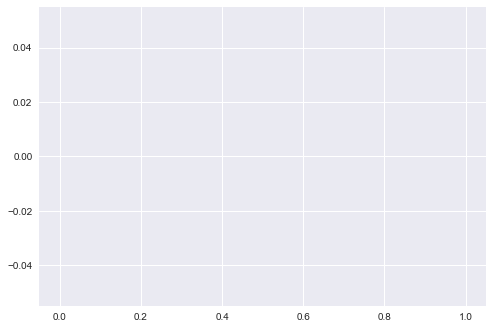

TEST_209_EGAR TEST_211_EGAR
Number of nonzero diffs: 0
Largest diff: 


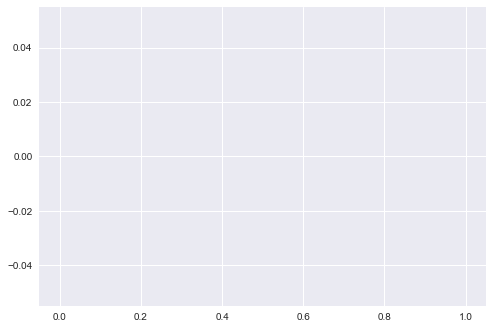

TEST_209_EGAR TEST_302_EGAR
Number of nonzero diffs: 234
Largest diff: 


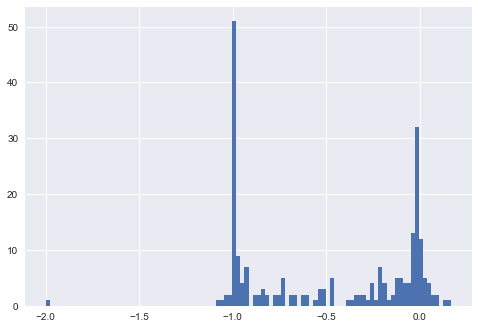

TEST_209_EGAR TEST_310_EGAR
Number of nonzero diffs: 234
Largest diff: 


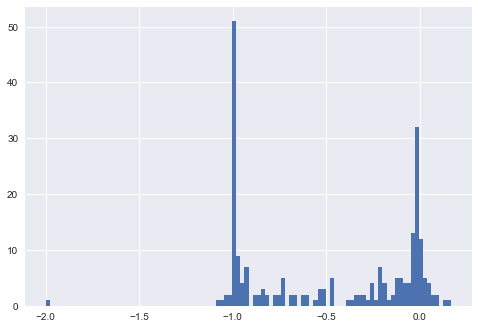

TEST_210_EGAR TEST_211_EGAR
Number of nonzero diffs: 0
Largest diff: 


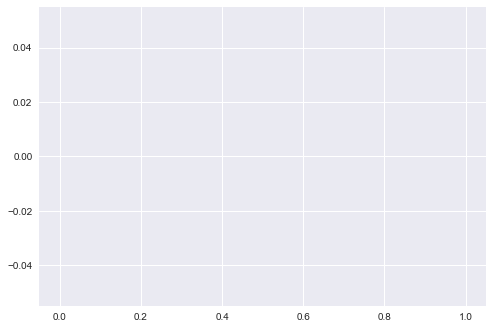

TEST_210_EGAR TEST_302_EGAR
Number of nonzero diffs: 234
Largest diff: 


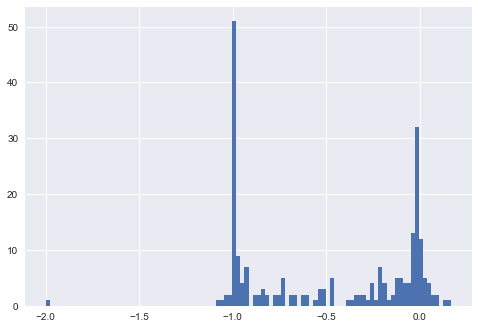

TEST_210_EGAR TEST_310_EGAR
Number of nonzero diffs: 234
Largest diff: 


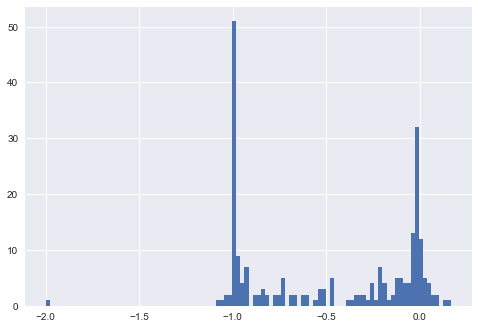

TEST_211_EGAR TEST_302_EGAR
Number of nonzero diffs: 234
Largest diff: 


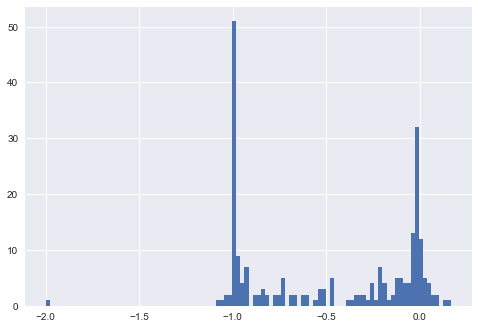

TEST_211_EGAR TEST_310_EGAR
Number of nonzero diffs: 234
Largest diff: 


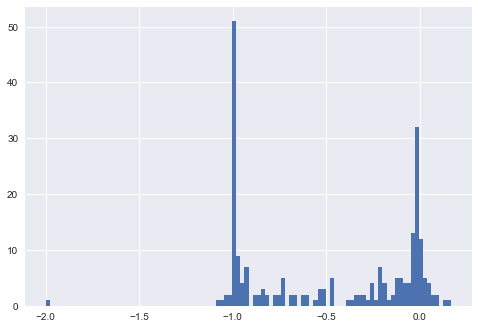

TEST_302_EGAR TEST_310_EGAR
Number of nonzero diffs: 0
Largest diff: 


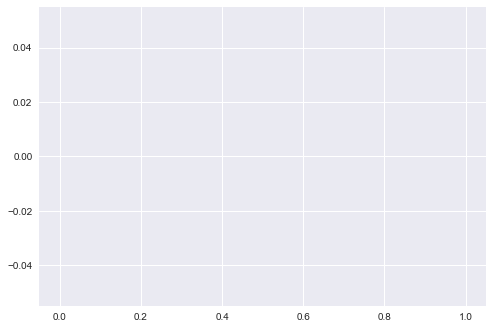

In [16]:
for x, y in combinations(egar_samples, 2):
    diff = np.array(rsem[x].expected_count) - np.array(rsem[y].expected_count)
    print x, y
    print 'Number of nonzero diffs: ' + str(np.shape(np.nonzero(diff))[1])
    print 'Largest diff: ' + str()
    plt.hist(diff[np.nonzero(diff)], bins=100)
    plt.show()

In [18]:
diff = np.array(rsem['TEST_208_EGAR'].expected_count) - np.array(rsem['TEST_302_EGAR'].expected_count)b

In [19]:
diff = [np.abs(x) for x in diff]

In [23]:
Counter(diff)

Counter({0.0: 60264,
         0.0099999999947613105: 1,
         0.0099999999983992893: 1,
         0.0099999999999909051: 13,
         0.010000000000000009: 1,
         0.010000000000001563: 1,
         0.010000000000005116: 1,
         0.010000000000047748: 1,
         0.010000000000218279: 16,
         0.010000000002037268: 1,
         0.010000000009313226: 1,
         0.019999999998617568: 1,
         0.019999999999527063: 2,
         0.01999999999998181: 1,
         0.019999999999996021: 1,
         0.019999999999999574: 2,
         0.020000000000095497: 1,
         0.020000000000436557: 3,
         0.029999999998835847: 1,
         0.029999999999745341: 1,
         0.029999999999972715: 2,
         0.030000000000001137: 1,
         0.030000000000086402: 1,
         0.030000000000654836: 1,
         0.03999999999996362: 4,
         0.039999999999999147: 1,
         0.040000000000000036: 1,
         0.040000000000006253: 1,
         0.040000000000020464: 1,
         0.0400000000008

## Gencode v25 vs v23 Expression Differences

Checking to see how moving to a new gencode version affects expression

In [8]:
sample = 'Gencodev25_310_EGAR'
rsem[sample] = pd.read_csv(sample + '/rsem/rsem_genes.results', sep='\t')
v23 = rsem['TEST_310_EGAR']
v25 = rsem['Gencodev25_310_EGAR']

In [17]:
print v23.shape
print v25.shape
print 'Number of different gene IDs between v23 and v25: {}'.format(len(set(v23.gene_id).difference(set(v25.gene_id))))
intersection = set(v23.gene_id).intersection(set(v25.gene_id))

(60498, 7)
(58037, 7)
Number of different gene IDs between v23 and v25: 5279


In [53]:
v23_inter = v23[v23.gene_id.isin(list(intersection))].sort_values('gene_id')
v25_inter = v25[v25.gene_id.isin(intersection)].sort_values('gene_id')
assert list(v23_inter.gene_id) == list(v25_inter.gene_id)


55219


## RSEM Concordance

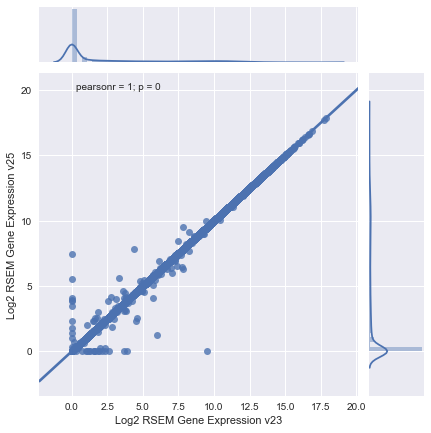

In [52]:
x = v23_inter.expected_count.apply(lambda x: np.log2(x+1))
y = v25_inter.expected_count.apply(lambda x: np.log2(x+1))

sns.jointplot(np.array(x), np.array(y), kind='reg')
plt.xlabel('Log2 RSEM Gene Expression v23')
plt.ylabel('Log2 RSEM Gene Expression v25')

Number of genes: 55219
Number of nonzero diffs: 750


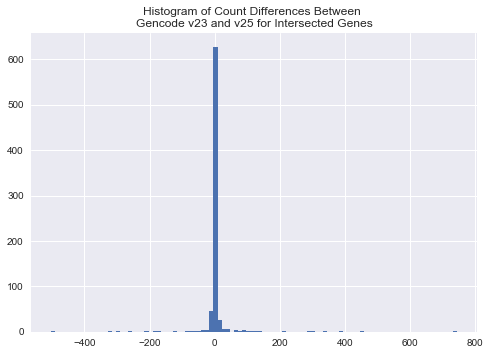

In [49]:
diff = np.array(v23_inter.expected_count) - np.array(v25_inter.expected_count)
print 'Number of genes: ' + str(len(diff))
print 'Number of nonzero diffs: ' + str(np.shape(np.nonzero(diff))[1])
plt.hist(diff[np.nonzero(diff)], bins=100)
plt.title('Histogram of Count Differences Between \nGencode v23 and v25 for Intersected Genes');

I was informed about Gencodes incremental gene scheme for new versions, so I'm correcting for that below

In [62]:
diff = list(set(v23.gene_id).difference(set(v25.gene_id)))

In [106]:
for gene in diff:
    t23 = v23[v23.gene_id.str.contains(gene.split('.')[0])]
    t25 = v25[v25.gene_id.str.contains(gene.split('.')[0])]
    if len(t23) == 1 and len(t25) > 0:
        v23.loc[t23.index[0], 'gene_id'] = t25.iloc[0].gene_id

In [107]:
print v23.shape
print v25.shape
print 'Number of different gene IDs between v23 and v25: {}'.format(len(set(v23.gene_id).difference(set(v25.gene_id))))
intersection = set(v23.gene_id).intersection(set(v25.gene_id))
print 'Number of Intersected Genes: {}'.format(len(intersection))

(60498, 7)
(58037, 7)
Number of different gene IDs between v23 and v25: 3090
Number of Intersected Genes: 57408


In [108]:
v23_inter = v23[v23.gene_id.isin(list(intersection))].sort_values('gene_id')
v25_inter = v25[v25.gene_id.isin(intersection)].sort_values('gene_id')
assert list(v23_inter.gene_id) == list(v25_inter.gene_id)


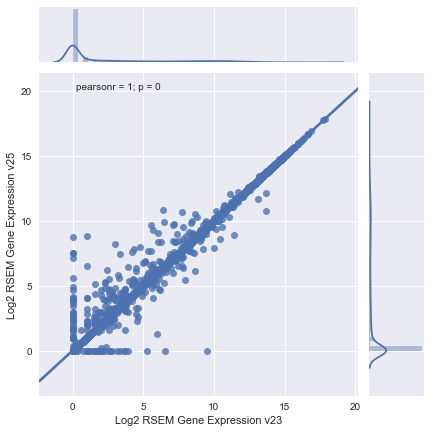

In [109]:
x = v23_inter.expected_count.apply(lambda x: np.log2(x+1))
y = v25_inter.expected_count.apply(lambda x: np.log2(x+1))

sns.jointplot(np.array(x), np.array(y), kind='reg')
plt.xlabel('Log2 RSEM Gene Expression v23')
plt.ylabel('Log2 RSEM Gene Expression v25')

Number of genes: 57408
Number of nonzero diffs: 1407


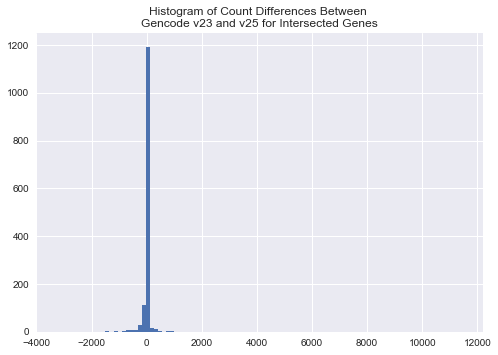

In [110]:
diff = np.array(v23_inter.expected_count) - np.array(v25_inter.expected_count)
print 'Number of genes: ' + str(len(diff))
print 'Number of nonzero diffs: ' + str(np.shape(np.nonzero(diff))[1])
plt.hist(diff[np.nonzero(diff)], bins=100)
plt.title('Histogram of Count Differences Between \nGencode v23 and v25 for Intersected Genes');

## Older Comparisons

In [32]:
rsem = {}
kallisto = {}
for sample in ['TEST_208', 'TEST_302', 'TEST_310']:
    rsem[sample] = pd.read_csv(sample + '/rsem/rsem_genes.results', sep='\t')
    kallisto[sample] = pd.read_csv(sample + '/kallisto/abundance.tsv', sep='\t')

### 2.0.8 and 3.0.2

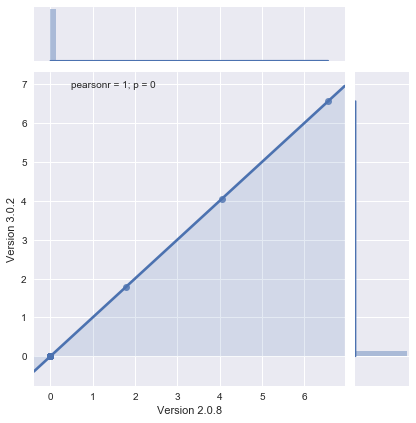

In [33]:
t208 = rsem['TEST_208'].expected_count.apply(lambda x: np.log(x+1))
t302 = rsem['TEST_302'].expected_count.apply(lambda x: np.log(x+1))

sns.jointplot(t208, t302, kind='reg')
plt.xlabel('Version 2.0.8')
plt.ylabel('Version 3.0.2');

### 3.0.2 and 3.1.1

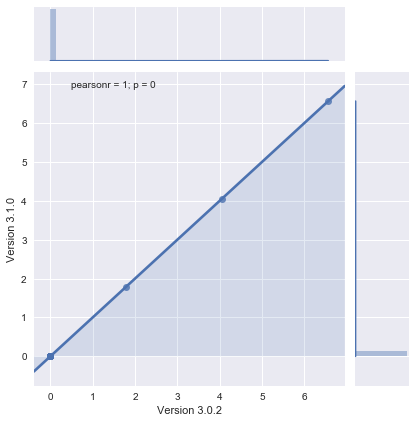

In [34]:
x = rsem['TEST_302'].expected_count.apply(lambda x: np.log(x+1))
y = rsem['TEST_310'].expected_count.apply(lambda x: np.log(x+1))

sns.jointplot(x, y, kind='reg')
plt.xlabel('Version 3.0.2')
plt.ylabel('Version 3.1.0');

By the commutative principle 2.0.8 == 3.1.0

# Kallisto

### 3.0.2 and 3.1.0

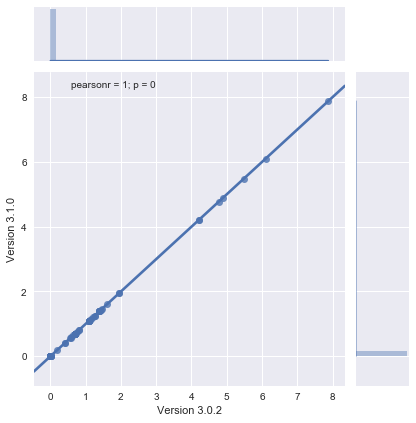

In [35]:
x = kallisto['TEST_302'].est_counts.apply(lambda x: np.log(x+1))
y = kallisto['TEST_310'].est_counts.apply(lambda x: np.log(x+1))

sns.jointplot(x, y, kind='reg')
plt.xlabel('Version 3.0.2')
plt.ylabel('Version 3.1.0');

### 2.0.8 and 3.1.0

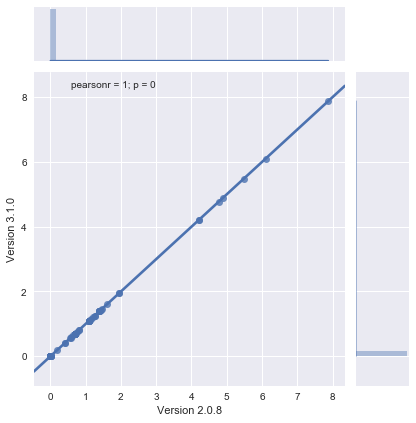

In [36]:
x = kallisto['TEST_208'].est_counts.apply(lambda x: np.log(x+1))
y = kallisto['TEST_310'].est_counts.apply(lambda x: np.log(x+1))

sns.jointplot(x, y, kind='reg')
plt.xlabel('Version 2.0.8')
plt.ylabel('Version 3.1.0');

## A Deeper Look

Given the number of genes we're looking at, concordance testing will swallow up minute differences. Instead we'll take the difference between the expected count set and plot that.


In [37]:
for x, y in combinations(['TEST_208', 'TEST_302', 'TEST_310'], 2):
    diff = np.array(rsem[x].expected_count) - np.array(rsem[y].expected_count)
    print x, y
    print 'Number of genes: ' + str(len(diff))
    print np.nonzero(diff)

TEST_208 TEST_302
Number of genes: 3004
(array([], dtype=int64),)
TEST_208 TEST_310
Number of genes: 3004
(array([], dtype=int64),)
TEST_302 TEST_310
Number of genes: 3004
(array([], dtype=int64),)


### Gerald Test Set

Testing another sample for validation

In [38]:
rsem = {}
kallisto = {}
for sample in ['TEST_gerald_208', 'TEST_gerald_302', 'TEST_gerald_310']:
    rsem[sample] = pd.read_csv(sample + '/rsem/rsem_genes.results', sep='\t')
    kallisto[sample] = pd.read_csv(sample + '/kallisto/abundance.tsv', sep='\t')

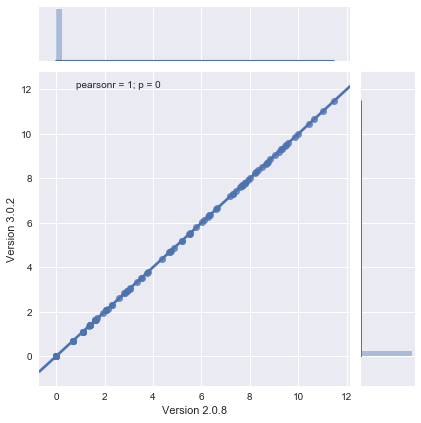

In [39]:
t208 = rsem['TEST_gerald_208'].expected_count.apply(lambda x: np.log(x+1))
t302 = rsem['TEST_gerald_302'].expected_count.apply(lambda x: np.log(x+1))

sns.jointplot(t208, t302, kind='reg')
plt.xlabel('Version 2.0.8')
plt.ylabel('Version 3.0.2');

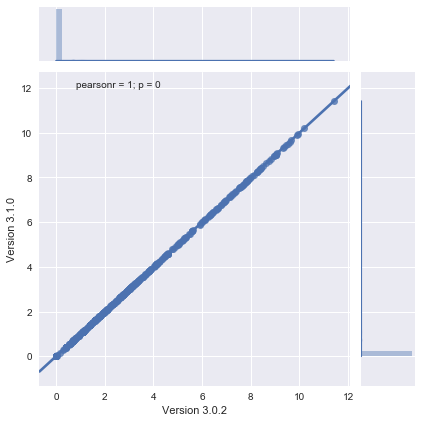

In [40]:
x = kallisto['TEST_gerald_302'].est_counts.apply(lambda x: np.log(x+1))
y = kallisto['TEST_gerald_310'].est_counts.apply(lambda x: np.log(x+1))

sns.jointplot(x, y, kind='reg')
plt.xlabel('Version 3.0.2')
plt.ylabel('Version 3.1.0');

In [41]:
for x, y in combinations(['TEST_gerald_208', 'TEST_gerald_302', 'TEST_gerald_310'], 2):
    diff = np.array(rsem[x].expected_count) - np.array(rsem[y].expected_count)
    print x, y
    print 'Number of genes: ' + str(len(diff))
    print np.nonzero(diff)

TEST_gerald_208 TEST_gerald_302
Number of genes: 60498
(array([], dtype=int64),)
TEST_gerald_208 TEST_gerald_310
Number of genes: 60498
(array([], dtype=int64),)
TEST_gerald_302 TEST_gerald_310
Number of genes: 60498
(array([], dtype=int64),)


### Testing 3.1.0 with STAR modification

The only change to any tool was a parameter to modify STAR's memory usage. I removed that to see if there are now any differences between 2.0.8 and 3.1.0.

In [9]:
rsem = {}
for sample in ['TEST_208_EGAR', 'TEST_310_EGAR_STAR', 'TEST_310_EGAR']:
    rsem[sample] = pd.read_csv(sample + '/rsem/rsem_genes.results', sep='\t')

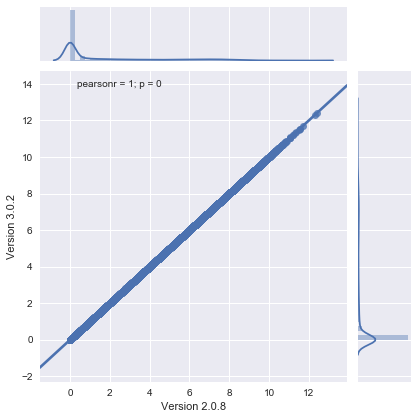

In [5]:
x = rsem['TEST_208_EGAR'].expected_count.apply(lambda x: np.log(x+1))
y = rsem['TEST_310_EGAR_STAR'].expected_count.apply(lambda x: np.log(x+1))

sns.jointplot(x, y, kind='reg')
plt.xlabel('Version 2.0.8')
plt.ylabel('Version 3.0.2');

TEST_208_EGAR TEST_310_EGAR_STAR
Number of genes: 60498
Number of nonzero diffs: 234


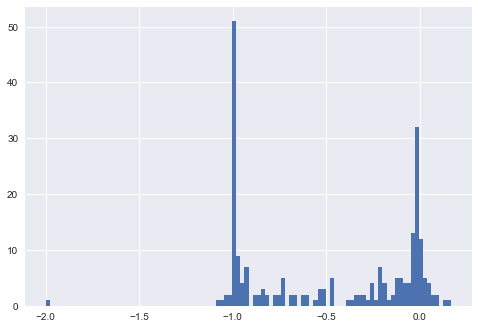

TEST_208_EGAR TEST_310_EGAR
Number of genes: 60498
Number of nonzero diffs: 234


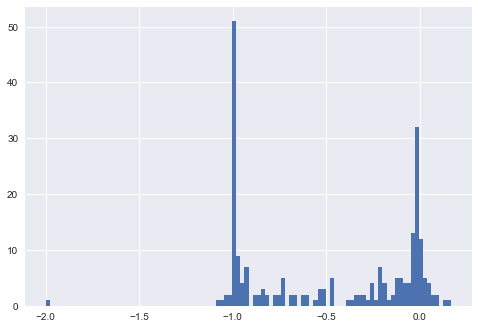

TEST_310_EGAR_STAR TEST_310_EGAR
Number of genes: 60498
Number of nonzero diffs: 0


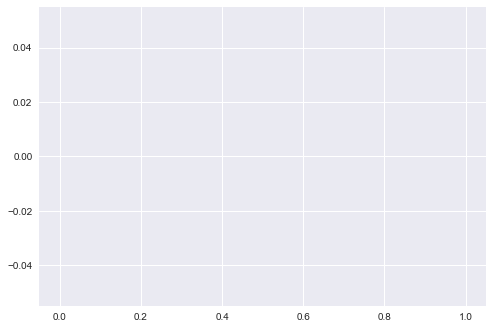

In [10]:
for x, y in combinations(['TEST_208_EGAR', 'TEST_310_EGAR_STAR', 'TEST_310_EGAR'], 2):
    diff = np.array(rsem[x].expected_count) - np.array(rsem[y].expected_count)
    print x, y
    print 'Number of genes: ' + str(len(diff))
    print 'Number of nonzero diffs: ' + str(np.shape(np.nonzero(diff))[1])
    plt.hist(diff[np.nonzero(diff)], bins=100)
    plt.show()